In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np

In [5]:

#Créer des dictionnaires associant des descriptions à son identifiant
description_id_mapping = {
    "Les lieux, véhicules, équipements, matériaux et ustensiles servant à la préparation au conditionnement, à l'entreposage, au transport, à l'étiquetage et au service des produits, ainsi que les autres installations et locaux sanitaires, doivent être propres.": 1,
    "Le produit altérable à la chaleur à l'exception des fruits et légumes frais entiers doit être refroidi sans retard et maintenu constamment à une température interne et ambiante ne dépassant pas 4C jusqu'à sa livraison au consommateur, sauf pendant le temps requis pour l'application d'un procédé de fabrication ou d'un traitement reconnu en industrie alimentaire et qui exige une plus haute température.": 2,
    "Le lieu ou le véhicule doit être exempt de contaminants, de polluants, de toute espèce d'animaux y compris les insectes et les rongeurs ou de leurs excréments.": 3,
    "Le produit périssable vendu chaud ou servi chaud au consommateur doit être gardé à une température interne d'au moins 60C jusqu'à sa livraison.": 4,
    "Les personnes affectées à la préparation des produits, au lavage ou au nettoyage du matériel et de l'équipement doivent: porter un bonnet ou une résille propre qui recouvre entièrement les cheveux; porter un couvre-barbe propre qui recouvre entièrement la barbe.": 5,
    "Tout produit conditionné en vue de la vente doit porter, en caractères indélébiles, très lisibles et apparents, sur le récipient, l'emballage ou l'enveloppe qui le contient les inscriptions nécessaires pour révéler la nature, l'état, la composition, l'utilisation, la quantité exacte, l'origine et toute particularité du produit; les nom et adresse du fabricant, préparateur, conditionneur, emballeur, fournisseur ou distributeur; le lieu de fabrication, préparation ou conditionnement du produit. L'énumération des composants doit figurer par ordre d'importance décroissant. L'indication de poids doit tenir compte de la perte que peut normalement subir le produit après son conditionnement et être exprimée en poids net.": 6,
    "Nul ne peut, sans être titulaire d'un permis en vigueur, exploiter un lieu ou un véhicule où est exercée l'activité de restaurateur.": 7,
    "Est prohibée toute tromperie ou tentative de tromperie, toute déclaration ou indication fausse, inexacte ou trompeuse, sous quelque forme et par quelque moyen que ce soit: a) sur la nature, l'état, la composition, l'identité, la provenance, l'origine, l'utilisation, la destination, la qualité, la quantité, la valeur, le prix ou une particularité du produit; b) sur le lieu, la date ou les procédés de préparation, fabrication, conservation ou conditionnement du produit; c) sur le mode d'emploi ou de conservation du produit; d) sur l'identité, les qualités ou aptitudes du producteur, préparateur, fabricant, conserveur, conditionneur, distributeur ou de l'agent de vente ou de livraison du produit.": 8,
    "Nul ne peut préparer, détenir en vue de la vente ou de la fourniture de services moyennant rémunération, recevoir, acheter pour fins de revente, mettre en vente ou en dépôt, vendre, donner à des fins promotionnelles, transporter, faire transporter ou accepter pour transport, tout produit destiné à la consommation humaine qui est impropre à cette consommation, qui est altéré de manière à le rendre impropre à cette consommation, dont l'innocuité n'est pas assurée pour cette consommation ou qui n'est pas conforme aux exigences de la présente loi et des règlements.": 9,
    "Dans un local, une aire ou un véhicule utilisé pour la préparation des produits personne ne peut y faire usage de tabac.": 10
}

statut_id_mapping =  {
    "Fermé": 0,
    "Fermé changement d'exploitant": 0,
    "Ouvert": 1,
    "Sous inspection fédérale": 1
}

categorie_id_mapping =  {
    "Restaurant": 1,
    "Restaurant service rapide": 2,
    "Épicerie avec préparation": 3,
    "Boucherie-épicerie": 4,
    "Pâtisserie": 5,
    "Boulangerie": 6,
    "Casse-croûte": 7,
    "Restaurant mets pour emporter": 8,
    "Supermarché": 9,
    "Traiteur": 10,
    "Charcuterie/fromage": 11,
    "Charcuterie": 12,
    "Épicerie": 13,
    "Poissonnerie": 14,
    "Brasserie": 15
}

ville_id_mapping =  {
    "LaSalle": 1,
    "St-Laurent": 2,
    "Kirkland": 3,
    "Montréal": 4,
    "Montréal-Nord": 5,
    "Boulangerie": 6,
    "Mont-Royal": 7,
    "St-Léonard": 8,
    "Dorval": 9,
    "Pointe-Claire": 10,
    "Dollard-des-Ormeaux": 11,
    "Montréal-Est": 12,
    "Verdun": 13,
    "Outremont": 14,
    "Anjou": 15,
    "Pierrefonds": 16,
    "Lachine": 17,
    "Ste-Anne-de-Bellevue": 18,
    "Westmount": 15,
    "Côte Saint-Luc": 19,
    "Montréal-Ouest": 20,
    "Rivière-des-Prairies": 21,
    "Roxboro": 22,
    "L'Ile Bizard": 23,
    "Beaconsfield": 24,
    "Ste-Geneviève": 25
}

In [6]:
#initial dataframe
df = pd.read_csv('./data/violations.csv')

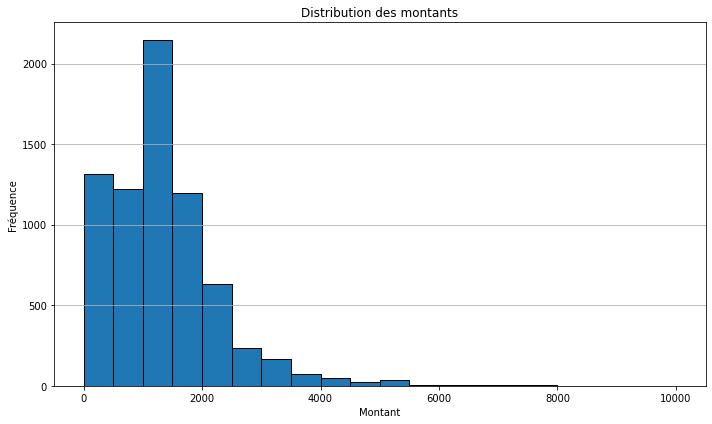

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['montant'], bins=20, edgecolor='black')
plt.title('Distribution des montants')
plt.xlabel('Montant')
plt.ylabel('Fréquence')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [8]:
#adding description_id column
df['description_id'] = df['description'].map(description_id_mapping)
#adding statut_id column
df['statut_id'] = df['statut'].map(statut_id_mapping)
#adding categorie_id column
df['categorie_id'] = df['categorie'].map(categorie_id_mapping)
#adding ville_id column
df['ville_id'] = df['ville'].map(ville_id_mapping)

In [9]:
#Nombre de lignes dans le DataFrame : 7106
nombre_de_lignes = df.shape[0]
print("Nombre de lignes dans le DataFrame :", nombre_de_lignes)

df['date_jugement'] = pd.to_datetime(df['date_jugement'])
df['date_statut'] = pd.to_datetime(df['date_statut'])

df_date = df[df['date_jugement'] <= df['date_statut']]

# Nombre de lignes avec statut_id = 0
nb_lignes_statut_0 = df_date[df_date['statut_id'] == 0].shape[0]
print("Nombre de lignes avec statut_id égal à 0 :", nb_lignes_statut_0)

# Nombre de lignes avec statut_id = 1
nb_lignes_statut_1 = df_date[df_date['statut_id'] == 1].shape[0]
print("Nombre de lignes avec statut_id égal à 1 :", nb_lignes_statut_1)

# Comptage du nombre de lignes par catégorie dans df_filtered
comptage_par_categorie = df_date['categorie'].value_counts()

# S'assurer de retirer les valeurs nulls
df_filtre_final = df_date.dropna()

Nombre de lignes dans le DataFrame : 7106
Nombre de lignes avec statut_id égal à 0 : 2775
Nombre de lignes avec statut_id égal à 1 : 89


In [10]:
# dbscan = DBSCAN(eps=0.5, min_samples=3)
# dbscan.fit(df_filtre_final[['montant']])
# df_filtre_final['montant_cluster_id'] = dbscan.labels_ + 1

# n_clusters = 5
# gmm = GaussianMixture(n_components=n_clusters, random_state=42)
# gmm.fit(df_filtre_final[['montant']])
# df_filtre_final['montant_cluster_id'] = gmm.predict(df_filtre_final[['montant']]) + 1

# n_clusters = 3 
# agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
# agg_clustering.fit(df_filtre_final[['montant']])
# df_filtre_final['montant_cluster_id'] = agg_clustering.labels_ + 1

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_filtre_final[['montant']])
df_filtre_final['montant_cluster_id'] = kmeans.labels_ + 1

colonnes_selectionnees = ['montant', 
                          'description_id', 
                          'categorie_id', 
                          'statut_id',
                        #   'ville_id'
                          ]

# Créer un nouveau DataFrame avec les colonnes sélectionnées
algo_df = df_filtre_final.loc[:, colonnes_selectionnees]

/Users/alexandrebrunet/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexandrebrunet/Library/Python/3.9/lib/python/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(
/var/folders/ly/lc78kyt50t7gd18dpbh_6wsh0000gn/T/ipykernel_94065/3336460619.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre_final['montant_cluster_id'] = kmeans.labels_ + 1


Accuracy: 0.9709864603481625
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       501
           1       0.60      0.19      0.29        16

    accuracy                           0.97       517
   macro avg       0.79      0.59      0.64       517
weighted avg       0.96      0.97      0.96       517

Confusion Matrix:
[[499   2]
 [ 13   3]]
Nombre total de branches dans la forêt aléatoire : 401


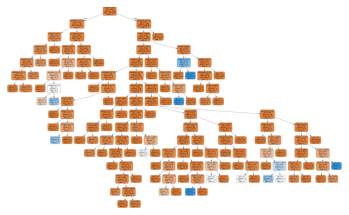

In [43]:
# Diviser les données en ensembles d'entraînement et de test
X = algo_df.drop('statut_id', axis=1)
y = algo_df['statut_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=3,
                                  random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
rf_model.fit(X_train, y_train)

# Prédire le statut_id sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Évaluez les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Compte le nombre de branches (nœuds) dans les arbres de la forêt
total_branches = sum(estimator.tree_.node_count for estimator in rf_model.estimators_)
print("Nombre total de branches dans la forêt aléatoire :", total_branches)


tree = rf_model.estimators_[0]

# Exporter l'arbre en format DOT avec une taille spécifiée
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns,  
                           class_names=rf_model.classes_.astype(str),  
                           filled=True, rounded=True,  
                           special_characters=True,
                        #    max_depth=10
                           )

# Convertir le format DOT en graphique
graph = pydotplus.graph_from_dot_data(dot_data)

# Afficher l'arbre
graph.write_png("arbre_decision.png")

# Afficher le fichier image
image = plt.imread("arbre_decision.png")
plt.imshow(image)
plt.axis("off")  # Masquer les axes
plt.show()

/Users/alexandrebrunet/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/alexandrebrunet/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/alexandrebrunet/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/alexandrebrunet/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/alexandrebrunet/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/User

Text(0, 0.5, 'accuracy')

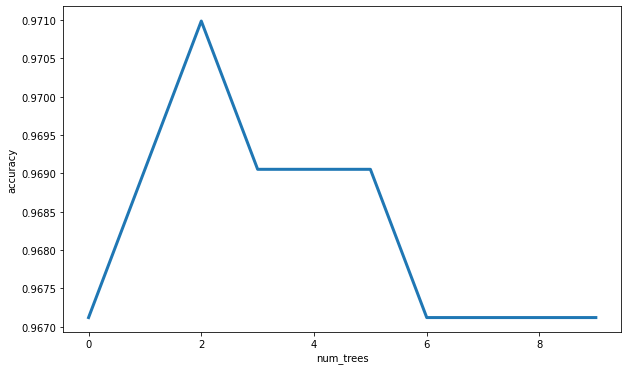

In [26]:
predictions = []
for tree in rf_model.estimators_:
    predictions.append(tree.predict_proba(X_test)[None, :])
    
predictions = np.vstack(predictions)
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_test, np.argmax(pred, axis=1)))

plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy')

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ros = RandomOverSampler(random_state=42)
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# adasyn = ADASYN(random_state=42)
# X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Initialisation du modèle RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle sur les données suréchantillonnées
rf_model.fit(X_train_resampled, y_train_resampled)

# Prédire le statut_id sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Compter le nombre de branches (nœuds) dans les arbres de la forêt
total_branches = sum(estimator.tree_.node_count for estimator in rf_model.estimators_)
print("Nombre total de branches dans la forêt aléatoire :", total_branches)

# Exporter un arbre individuel (optionnel)
tree = rf_model.estimators_[0]
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns,  
                           class_names=rf_model.classes_.astype(str),  
                           filled=True, rounded=True,  
                           special_characters=True,
                           max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("arbre_decision.png")

# Afficher l'arbre (optionnel)
image = plt.imread("arbre_decision.png")
plt.imshow(image)
plt.axis("off")
plt.show()

In [ ]:
X = algo_df.drop('statut_id', axis=1)
y = algo_df['statut_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))